# Aprendizado de Máquina - Projeto 3
### Guilherme Pereira Corrêa 198397, Bruno Moreira 165295

Por conta do código do pacman ser muito extenso, neste notebook foram copiadas somentes as partes do código mais importantes e que foram discutidas, o restante do código utilizado está em anexo.

Para a parte de aprendizado por reforço, os arquivos customizados utilizados estão dentro da pasta CódigoRL/search e foram: myEnv.py, myAgent.py e projeto3.py.

Para a parte evolutiva, os arquivos customizados estão dentro da pasta CódigoPG, foi alterado somente o Agents.py e criado um main.py.

# Contribuições

O aluno Bruno Moreira foi responsável por propor e desenvolver o modelo utilizado na "Parte I - Evolutionary Model", enquanto o aluno Guilherme Pereira ficou responsável pela solução e implementação da "Parte II - Reinforcement Learning".

# Parte I - Evolutionary Model

O modelo utilizado para resolver o problema é baseado em Programação Genética utilizando uma arvore de decisões. Foi utilizada a biblioteca DEAP, que é um framework capaz de auxiliar na prototipação
e testes de algoritmos geneticos.


## Métodos auxiliares

Para auxiliar na resolução do problema, foi utilizada uma árvore de decisões que em suas folhas (input) estão os resultados das funções auxiliares criadas e sua raíz (output) é um valor associado ao 
quão boa é a direção que está sendo tomada. Essas funções foram baseadas nas descritas no artigo "Reactive Control of Ms. Pac Man using Information Retrieval based on Genetic Programming" (BRANDSTETTER, Mathias; AHMADI, Samad) e calculam a distância entre o sucessor do pacman (posição do pacman caso ele seguisse na direção indicada) e um determinado objetivo, sejam fantasmas, comidas ou até mesmo as capsulas de poder.

As funções são:
- distToNextGhost(): distância do sucessor do pacman até o fantasma mais próximo.
- distToNextEdibleGhost(): distância do sucessor do pacman até o fantasma comestível mais próximo.
- distToNextPowerPill(): distância do sucessor do pacman até a capsula de poder mais próxima.
- distToNextFoodPill(): distância do sucessor do pacman até a comida mais próxima.

In [ ]:
class DirectionValue():
    def __init__(self, direction, value):
        self.direction = direction
        self.value = value

class DumbAgent(Agent):
    def __init__(self, arvore_decisoes):
        self.move_function = arvore_decisoes
        
    def getAction(self, state):
        actualAction = self.evaluateTrees(state)
    
        if (actualAction not in state.getLegalPacmanActions()):
            actualAction = Directions.STOP

        return actualAction
    
    def evaluateTrees(self, state):
        north_value = DirectionValue("North", -1)
        south_value = DirectionValue("South", -1)
        east_value = DirectionValue("East", -1)
        west_value = DirectionValue("West", -1)
        stop_value = DirectionValue("Stop", -1)
        dir_values = [north_value, south_value, east_value, west_value, stop_value]

        if (Directions.NORTH in state.getLegalPacmanActions()):
            x = distToNextGhost(state, Directions.NORTH)
            y = distToNextFoodPill(state, Directions.NORTH)
            w = distToNextEdibleGhost(state, Directions.NORTH)
            z = distToNextPowerPill(state, Directions.NORTH)
            k = distBetweenClosestGhostAndClosestPowerPill(state, Directions.NORTH)
            north_value.value = self.move_function(x, y, w, z, k)
        
        if (Directions.SOUTH in state.getLegalPacmanActions()):
            x = distToNextGhost(state, Directions.SOUTH)
            y = distToNextFoodPill(state, Directions.SOUTH)
            w = distToNextEdibleGhost(state, Directions.SOUTH)
            z = distToNextPowerPill(state, Directions.SOUTH)
            k = distBetweenClosestGhostAndClosestPowerPill(state, Directions.SOUTH)
            south_value.value = self.move_function(x, y, w, z, k)
        
        if (Directions.WEST in state.getLegalPacmanActions()):
            x = distToNextGhost(state, Directions.WEST)
            y = distToNextFoodPill(state, Directions.WEST)
            w = distToNextEdibleGhost(state, Directions.WEST)
            z = distToNextPowerPill(state, Directions.WEST)
            k = distBetweenClosestGhostAndClosestPowerPill(state, Directions.WEST)
            west_value.value = self.move_function(x, y, w, z, k)
        
        if (Directions.EAST in state.getLegalPacmanActions()):
            x = distToNextGhost(state, Directions.EAST)
            y = distToNextFoodPill(state, Directions.EAST)
            w = distToNextEdibleGhost(state, Directions.EAST)
            z = distToNextPowerPill(state, Directions.EAST)
            k = distBetweenClosestGhostAndClosestPowerPill(state, Directions.EAST)
            east_value.value = self.move_function(x, y, w, z, k)
        
        x = distToNextGhost(state, Directions.STOP)
        y = distToNextFoodPill(state, Directions.STOP)
        w = distToNextEdibleGhost(state, Directions.STOP)
        z = distToNextPowerPill(state, Directions.STOP)
        k = distBetweenClosestGhostAndClosestPowerPill(state, Directions.STOP)
        stop_value.value = self.move_function(x, y, w, z, k)
        
        best_direction = dir_values[0]
        for dir in dir_values:
            if (dir.value >= best_direction.value):
                best_direction = dir
        return best_direction.direction


def distBetweenClosestGhostAndClosestPowerPill(state, direction):
    if direction not in state.getLegalPacmanActions():
        return -1
    dist_next_ghost = distToNextGhost(state, direction)
    dist_next_power_pill = distToNextPowerPill(state, direction)
    return dist_next_ghost - dist_next_power_pill

def distToNextGhost(state, direction):
    if direction not in state.getLegalPacmanActions():
        return -1
    successorState = state.generateSuccessor(0, direction)
    ghostStates = successorState.getGhostStates()
    nonEdibleGhostDistances = []
    pacmanPosition = successorState.getPacmanPosition()
    wallGrid = successorState.getWalls().data
    for ghostState in ghostStates:
        if ghostState.scaredTimer <= 0:
            position = ghostState.getPosition()
            pacmanPoint = Point(pacmanPosition[0], pacmanPosition[1])
            ghostPoint = Point(int(position[0]), int(position[1]))
            nonEdibleGhostDistances.append(BFS(wallGrid, pacmanPoint, ghostPoint))
    return min(nonEdibleGhostDistances) if len(nonEdibleGhostDistances) > 0 else -1
 
 
def distToNextEdibleGhost(state, direction):
    if direction not in state.getLegalPacmanActions():
        return -1
    successorState = state.generateSuccessor(0, direction)
    ghostStates = successorState.getGhostStates()
    edibleGhostDistances = []
    pacmanPosition = successorState.getPacmanPosition()
    wallGrid = successorState.getWalls().data
    for ghostState in ghostStates:
        if ghostState.scaredTimer > 0:
            position = ghostState.getPosition()
            pacmanPoint = Point(pacmanPosition[0], pacmanPosition[1])
            ghostPoint = Point(int(position[0]), int(position[1]))
            edibleGhostDistances.append(BFS(wallGrid, pacmanPoint, ghostPoint))
    return min(edibleGhostDistances) if len(edibleGhostDistances) > 0 else -1
 
def distToNextPowerPill(state, direction):
    if direction not in state.getLegalPacmanActions():
        return -1
    successorState = state.generateSuccessor(0, direction)
    capsuleDistances = []
    pacmanPosition = successorState.getPacmanPosition()
    wallGrid = successorState.getWalls().data
    for capsulePosition in successorState.getCapsules():
            pacmanPoint = Point(pacmanPosition[0], pacmanPosition[1])
            capsulePoint = Point(int(capsulePosition[0]), int(capsulePosition[1]))
            capsuleDistances.append(BFS(wallGrid, pacmanPoint, capsulePoint))
    return min(capsuleDistances) if len(capsuleDistances) > 0 else -1
 
def distToNextFoodPill(state, direction):
    if direction not in state.getLegalPacmanActions():
        return -1
    successorState = state.generateSuccessor(0, direction)
    foodDistances = []
    pacmanPosition = successorState.getPacmanPosition()
    wallGrid = successorState.getWalls().data
    for foodPosition in successorState.getFood().asList():
            pacmanPoint = Point(pacmanPosition[0], pacmanPosition[1])
            foodPoint = Point(int(foodPosition[0]), int(foodPosition[1]))
            foodDistances.append(BFS(wallGrid, pacmanPoint, foodPoint))
    return min(foodDistances) if len(foodDistances) > 0 else -1    

As funções listadas acima utilizam da busca em largura (BFS) para encontrar o caminho levando em consideração as paredes do cenário e todas as funções foram implementadas no arquivo Agents.py, responsável por instanciar o Agente a ser utilizado em cada partida.

In [ ]:
rowNum = [-1, 0, 0, 1]
colNum = [0, -1, 1, 0]
 
def BFS(mat, src: Point, dest: Point):
 
    height = len(mat)
    width = len(mat[0])
 
    if mat[src.x][src.y] != False or mat[dest.x][dest.y] != False:
        return -1
 
    visited = [[False for i in range(width)] for j in range(height)]
 
    visited[src.x][src.y] = True
 
    q = deque()
 
    s = queueNode(src,0)
    q.append(s)

    while q:
        curr = q.popleft()
        pt = curr.pt
        if pt.x == dest.x and pt.y == dest.y:
            return curr.dist
 
        for i in range(4):
            row = pt.x + rowNum[i]
            col = pt.y + colNum[i]             
            if (isValid(row,col, height, width)):
                if (mat[row][col] == False and not visited[row][col]):
                    visited[row][col] = True
                    Adjcell = queueNode(Point(row,col), curr.dist+1)
                    q.append(Adjcell)
    return -1

## Árvore de decisões

A árvore de decisões criada a partir da biblioteca DEAP é criada no arquivo main.py e é estruturada da seguinte forma, em suas folhas temos as distancias calculadas a partir das funções auxiliares e em seus nós intermediários temos 4 tipos de operações: adição, subtração, multiplicação e negação. Sendo assim, a ideia é que, ao receber uma possível direção, as funções auxiliares calculem as distâncias entre o pacman e o objeto de interesse para que sirvam de input para a arvore de decisões que retornará, em sua raiz, o valor associado àquela direção com base no genótipo do indivíduo.

In [2]:
from deap import gp, base, tools, creator, algorithms
import operator

pset = gp.PrimitiveSet("main", 5)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)

pset.renameArguments(ARG0='x')
pset.renameArguments(ARG1="y")
pset.renameArguments(ARG2="w")
pset.renameArguments(ARG3="z")
pset.renameArguments(ARG4="k")

A função evaluate_trees() definida no corpo da classe DumbAgent() é responsável por avaliar o retorno das 5 árvores, uma para cada direção, e optar pela direção que tiver maior valor associado.

## Hiperparâmetros do modelo

Os hiperparâmetros foram definidos com base no paper citado anteriormente e foram configurados como:
- Tamanho da população: 50 individuos.
- Critério de parada: 120 gerações.
- Técnica de crossover: ponto único, com 50% de chance.
- Técnica de mutação: uniforme e generativa, com 10% de chance para cada indivíduo.
- Técnica de seleção: torneio, selecionando os 10 melhores de cada geração.
- Função de fitness: a função de fitness é a média de três scores resultantes das partidas de pacman, já que ela considera o número de comidas coletadas, tempo de sobrevivencia, derrota, vitória e fantasmas derrotados.

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin, pset=pset)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genFull, pset=pset, min_=2, max_=5)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", runGame)
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("select", tools.selTournament, tournsize=10)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

## Treinando o modelo

Para treinar o modelo, foi utilizado o layout "smallClassic" do pacman para garantir melhor performance do hardware durante o período. Além disso, cada indivíduo teve três partidas com scores computados e o fitness foi calculado a partir da média desses resultados. A função responsável por executar o jogo recebe, como parametro, um indivíduo o qual o genótipo foi criado aleatóriamente pelo framework resultando em uma árvore de decisões única e, também, um indicador de qual layout será executado.

Durante o treinamento do modelo o jogo foi configurado para que não houvesse interface gráfica, apenas simulava a partida de pacman e retornava o score obtido. O restante das regras se manteve o padrão estabelecido no projeto.

In [ ]:
def createGame(newAgent,layout, pacman, ghosts, display, numGames, record, numTraining = 0, catchExceptions=False, timeout=30):
    rules = ClassicGameRules(timeout)
    gameDisplay = textDisplay.NullGraphics()
    rules.quiet = True
    beQuiet = True
    return rules.newGame(layout, newAgent, ghosts, gameDisplay, beQuiet, catchExceptions)

def runGame(individual, layout = 0):
    func = toolbox.compile(expr=individual)
    pacman = DumbAgent(func)
    if (layout == 0):
        args = readCommand("-l smallClassic".split())
    elif (layout == 1):
        args = readCommand("-l mediumClassic".split())
    else:
        args = readCommand("-l originalClassic".split())
    
    k = 0
    score = 0
    for __i__ in range(3):
        game = createGame(**args, newAgent = pacman)
        game.run()
        score += game.state.getScore()
        k += 1
    return score/k,

def main():
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", numpy.mean)
    mstats.register("std", numpy.std)
    mstats.register("min", numpy.min)
    mstats.register("max", numpy.max)
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 120, stats = mstats, halloffame=hof, verbose=True)
    return pop, log, hof

pop, logbook, hof = main()
best_individual = hof[0]
gen = logbook.select("gen")
fit_mins = logbook.chapters["fitness"].select("min")
fit_avgs = logbook.chapters["fitness"].select("avg")
fit_maxs = logbook.chapters["fitness"].select("max")

plt.plot(gen, fit_mins, color="#55B255", label="Worst")
plt.plot(gen, fit_avgs, color="#FF9F4C", label="Average")
plt.plot(gen, fit_maxs, color="#468FC1", label="Best")

plt.xlabel("Generation")
plt.ylabel("Score")
plt.legend()
plt.title("GA Convergence")

plt.show()

def testBestIndividual(best_individual, layout):
    score = []
    for __i__ in range(10):
        score.append(runGame(best_individual, layout)[0])
    return score

print("\nSmall Classic:")
print(testBestIndividual(best_individual, 0))

print("\nMedium Classic:")
print(testBestIndividual(best_individual, 1))

print("\nOriginal Classic:")
print(testBestIndividual(best_individual, 2))

Além disso, foi criado o "hall da fama" e configurado como o objeto responsável por guardar o melhor indivíduo de todas as gerações durante o treinamento do modelo. Após a finalização do treinamento foi gerado um gráfico com as estatísticas de cada geração.

![ga_convergence.png](./ga_convergence.png)

## Resultados

Após 120 gerações a média de fitness se manteve abaixo de -200, e apenas os melhores de cada geração conseguiam alcançar pontuações médias próximas de 0.

## Testando o modelo

Com o modelo testado, foi selecionado o indivíduo salvo pelo hall da fama para executar mais dez vezes em cada layout "smallClassic", "mediumClassic" e "originalClassic" com as mesmas configurações para todos os jogos. Os scores obtidos em cada layout foram:

![final_scores.png](./final_scores.png)

Resultando em um fitness médio de -555,7 para o layout "smallClassic", -508,4 para o layout "mediumClassic" e -483 para o layout "originalClassic"

## Conclusão e melhorias do modelo proposto

Como foi possível observar no gráfico resultante das gerações de treinamento, o modelo sofreu convergencia prematura, ou seja, durante diversas gerações o melhor indivíduo não apresentou melhora significativa e não foi capaz de alcançar o resultado esperado. Para tentar solucionar o problema, foram aumentadas as taxas de mutação (de 10% para 20%) e de crossover (de 50% para 80%). Além disso, o número de geração foi reduzido para 100 e a quantidade de indivíduos na população inicial foi aumentado para 100. As melhoras foram notavelmente significativas como podemos notar no gráfico abaixo

![ga_convergence_updated.png](./ga_convergence_updated.png)

Ao testar o melhor indivíduo desse novo treinamento nos três layouts obtivemos os seguintes resultados:

![final_scores_updated.png](./final_scores_updated.png)

Apesar da significante melhoria, notamos que o modelo proposto não alcançou bons scores consistentemente o que refletiu nos resultados dos testes. Para garantir melhores resultados, acreditamos que aumentar a complexidade da função de fitness para levar diferenciar partidas ganhas de partidas perdidas e também acrescentar outros operadores na árvore de decisão. 

## Bibliografia:
- Framework DEAP: https://github.com/deap/deap.
- Reactive Control of Ms. Pac Man using Information Retrieval
based on Genetic Programming (BRANDSTETTER, Mathias; AHMADI, Samad).
- Evolving diverse Ms. Pac-Man playing agents using genetic programming (M. ALHEJALIM, Atif; M. SIMON, Lucas).



# Parte II - Reinforcement Learning

Para abordar o problema utilizando aprendizado por reforço, foi utilizada a biblioteca TensorForce, que é um framework open-source de deep reinforcement learning. Dentro da biblioteca, foi utilizada uma Deep-Q Network, mais detalhes sobre a estrutura da mesma serão dados ao longo da discussão, pois a configuração foi alterada conforme testes eram feitos.

## Formulação do MDP

Para formular um Processo de Decisão de Markov, é preciso definir quais serão as ações que o agente poderá fazer, o espaço de estados do ambiente e a função reforço. Utilizar a biblioteca TensorForce não é diferente nesse quesito, onde isso é possível ser feito ao criar uma classe herdeira de Enviroment do TensorFlow e definir os seguintes métodos:

In [ ]:
class CustomEnvironment(Environment):

    def __init__(self):
        super().__init__()

    def states(self):
        return dict(type='float', shape=(8,))

    def actions(self):
        return dict(type='int', num_values=4)

    # Optional: should only be defined if environment has a natural fixed
    # maximum episode length; otherwise specify maximum number of training
    # timesteps via Environment.create(..., max_episode_timesteps=???)
    def max_episode_timesteps(self):
        return super().max_episode_timesteps()

    # Optional additional steps to close environment
    def close(self):
        super().close()

    def reset(self):
        state = np.random.random(size=(8,))
        return state

    def execute(self, actions):
        next_state = np.random.random(size=(8,))
        terminal = np.random.random() < 0.5
        reward = np.random.random()
        return next_state, terminal, reward

### Ações

O espaço de ações do pacman é relativamente simples, somente cinco ações são possíveis: NORTH, SOUTH, WEST, EAST e STOP. Sendo assim, essas direções foram codificadas em inteiros e o método actions do nosso ambiente ficou da seguinte forma:

In [2]:
def actions(self):
    # Um inteiro que pode assumir 5 valores diferentes
    return dict(type='int', num_values=5)

### Estados

Definir como o estado do MDP será formado é de extrema importância para a convergência do algoritmo e, por isso, foi empregado muito tempo pensando-se em uma forma dele conter todas as informações necessárias para o pacman saber o que deve ser feito, ao mesmo tempo em que evitava-se construir um estado muito complexo que fizesse com que o treinamento demandasse um tempo muito grande.

Primeiramente o estado foi composto somente de:
- posição (x,y) do pacman
- posição (x,y) dos fantasmas
- uma matriz do tamanho do layout smallClassic de booleanos, indicando se há comida ou não em cada ponto

Porém logo percebeu-se que esta composição não era completa o suficiente por diversos motivos, dentre eles a falta de informação sobre a direção de movimentos dos personagens do jogo e também a falta de informação sobre as cápsulas. Portanto, definiu-se o estado da seguinte maneira:

- posição (x,y) do pacman no estado atual e no estado anterior;
- posição (x,y) do fantasma mais próximo no estado atual e no estado anterior;
- posição da cápsula mais próxima;
- posição da comida mais próxima;
- o tempo em que o fantasma mais próximo ficará assustado, caso ele não esteja esse valor é 0;
- um booleano indicando se há comida no ambiente;
- um booleano indicando se há fantasmas no ambiente;
- um vetor de booleanos indicando quais são as ações válidas para o estado atual;
- um booleano indicando se há comida próxima (2 células de distância) e não há fantasmas próximos.

Desta maneira, o agente tem informação sobre a direção de movimento dos personagens do jogo (já que agora tem-se a posição dos mesmos no instante anterior), sobre as cápsulas, sabe se pode ou não comer comida tranquilamente e, também, percebeu-se que não é necessário saber a posição de todos os fantasmas, somente a do mais próximo, que é o que apresenta perigo ao pacman.

Esses estados foram concatenados em dois tensores, um para as posições e um para os booleanos, sendo assim, a definição dos estados, em código, foi:



In [ ]:
def states(self):
        return {
        # min_value is -1 because its the value the position is set when the character doesnt exist at the moment
        # max_value is 40 because the ghost scared timer starts with 39
        'positions':dict(type='float',shape=(7,2), min_value = -1, max_value = 40),
        'booleans': dict(type = 'bool', shape = (8,))
        }

### Função reforço

A função reforço foi definida considerando que é desejado que o pacman coma todas as comidas e também coma as capsulas, dados que elas aumentam consideravelmente a chance de se ganhar o jogo. Sendo assim, definiu-se um reforço de -1 se o pacman não comeu nada ao realizar a ação, um reforço de 1 se ele comeu uma comida, um reforço de 20 se ele comeu uma capsula, um reforço de 20 se ele comeu um fantasma e, por fim, um reforço de 100 se ele venceu a partida e de -100 se ele perdeu a partida. Além disso, nas primeiras execuções percebeu-se que havia a possibilidade do agente escolher uma ação não válida, o que encerrava o treinamento, para resolver isso, toda vez que uma ação inválida é selecionada, ela é transformada em STOP e o agente recebe um reforço de -5. Assim, a função definida foi a seguinte:

In [ ]:
def reward_function(self, state, action):
        valid_action = action
        # Agent also gets a bad reward if it selected a non valid action
        if action not in state.getLegalPacmanActions():
            legal_action_reward = -5
            valid_action = Directions.STOP
        else:
            legal_action_reward = 0

        next_game_state = state.generatePacmanSuccessor(valid_action)

        # Scores obtained by action
        if next_game_state.getNumFood() < state.getNumFood():
            # ate one food
            score_gain = 1
        elif len(next_game_state.getCapsules()) < len(state.getCapsules()):
            # ate a capsule
            score_gain = 20
        else:
            # didn't eat anything
            score_gain = -1
        if (next_game_state.getNumAgents() < state.getNumAgents()):
            # ate a ghost
            eat_ghost_reward = 20
        else:
            eat_ghost_reward = 0

        # Reward also depends on winning or not the game
        if next_game_state.isWin():
            win_lose_reward = 100
        elif next_game_state.isLose():
            win_lose_reward = -100
        else:
            win_lose_reward = 0
        
        return score_gain + win_lose_reward + legal_action_reward + eat_ghost_reward

### Critério de parada

Foi utilizado como critério de parada o fim da partida, ou seja, a vitória ou derrota do agente. Essa escolha foi feita pensado-se que, em um ambiente real, é esperado que o agente termine a partida ganhando ou perdendo, onde prefere-se que o agente ganhe. Espera-se que terminar cada episódio nessas condições e fazer com que o agente sempre receba uma recompensa de derrota ou vitória evite, por exemplo, que ele aprenda a ter uma recompensa muito grande no começo da partida e fique parado até o fim do episódio.

## Treinamento no layout smallClassic

Os primeiros testes foram feitos no layout smallClassic devido à sua complexidade menor.

O algoritmo escolhido para ser utilizado foi o DQN (Deep Q Network), pois apresenta bons resultados na literatura. O princípio de funcionamento do mesmo se baseia em utilizar uma rede neural como um aproximador de função para encontrar o valor Q(s,a) das combinações estado/ação.

Portanto, o agente do TensorForce utilizado foi o DQN, cujos hiperparâmetros foram configurados, inicialmente, da seguinte maneira:

- network = 'auto', que indica que a rede neural será configurada automaticamente baseando-se nos tipos e formatos dos estados;
- memory = 100000, que indica o tamanho da replay memory, que é utilizada para fazer com que o agente aprendiz possa lembrar e reutilizar experiências passadas, o que pode fazer com que o treinamento seja mais rápido e, principalmente, quebrar relações temporais indesejadas;
- batch_size = 10, que indica o número de timesteps por update batch;
- update_frequency = 1, que indica a frequência de atualizações relativo ao tamanho do batch;
- learning_rate = 0.001, que é o fator que multiplacará o erro durante a atualização da rede neural;
- discount = 0.95, o fator de desconto dos reforços futuros, ou seja, quanta "importância" o agente dá para reforços que virão somente no futuro;
- predict_terminal_values = True, que indica que o valor dos estados terminais será estimado, isso deve ocorrer pois o fim do episódio não se dá por alcançar um limite de timesteps;
- exploration = 0.01, que indica a probabilidade de ser feita uma ação aleatória, ou seja, a taxa de exploração.

Sendo assim, a definição do nosso agente ficou da seguinte forma:

In [ ]:
agent = Agent.create(
        agent='dqn', environment=environment,
        # Automatically configured network
        network= 'auto'
        memory = 100000,
        # Optimization
        batch_size=10, 
        update_frequency = 1,
        learning_rate=0.001,
        discount=0.95, predict_terminal_values=True,
        # Exploration
        exploration=0.01
    )

Para realizar o treinamento foi implementada a função run_train, que recebe como parâmetro o ambiente, o agente, o número de episódios de treinamento desejado, a frequência que deseja-se imprimir o resultado atual na tela, a frequência com que deseja-se salvar o agente atual, o diretório onde será salvo o checkpoint e um booleano para ativar a visualização gráfico da partida. Além disso, esta função também gera um gráfico da pontuação de cada partida e da média da pontuação e taxa de vitória dos últimos jogos, onde este número é definido pela frequência de impressão.

Um problema que notou-se nos primeiros momentos de teste foi: por conta da estocasticidade do ambiente (movimentação dos fantasmas), nem sempre o próximo estado gerado pelo método state.generatePacmanSuccessor(action) é o real estado seguinte, isso fazia com que, quando o pacman morria devido ao fantasma andar para cima dele, e não ele andar para cima do fantasma, a partida se encerrava e outro episódio começava sem o agente observar o valor de terminal = True, pois esse valor era calculado utilizando a previsão baseada somente na ação do pacman. Sendo assim, sempre que a partida terminava e o agente não havia registrado um terminal True, foi feito um último time step, hard coded, para garantir que o agente observasse o estado terminal.

Além disso, a estrutura adotada foi a act-observe do TensorForce, onde estes dois passos eram feitos dentro do método getAction da classe MyPacman implementada, que é chamada pelo próprio framework do jogo a cada timestep para receber a próxima ação a ser feita. Para isso, basta passar o agente implementado como parâmetro para o método createGame() do arquivo game.py.

F oi utilizada a biblioteca networkx para calcular a distância entre dois pontos no grid e decidir qual o fantasma e cápsula mais próximos. Com esta biblioteca foi gerado um grafo em forma de grid 2D e então excluiu-se os nós correspondentes as paredes do ambiente, com isso usou-se o método shortest_path para encontrar o menor caminho entre dois nós e, então, saber a distância entre os mesmos considerando as paredes do mapa. O grafo foi definido como um atributo do ambiente, e é inicializado na primeira chamada do build_state.

A classe MyPacman, a função run_train, o método execute do ambiente, build_graph, min_distance e build_state foram:

In [ ]:
class MyPacman(Agent):

    def __init__(self, environment, learner_agent, index = 0):
        super().__init__(index)
        self.environment = environment
        self.learner_agent = learner_agent
        self.built_state = self.environment.reset()
        self.num_updates = 0
        self.total_reward = 0
        self.last_terminal = False

    def getAction(self,state):
        self.built_state = self.environment.build_state(state, self.built_state)
        
        # get action from tensorforce agent
        action = self.learner_agent.act(self.built_state)
        # transform the action, that is a int, into a real game action
        game_action = self.number_to_action(action)
        states, terminal, reward = self.environment.execute(actions=game_action, state = state)
        
        # update last terminal so the run_train can have access to it
        self.last_terminal = terminal
        self.total_reward += reward
        self.num_updates += self.learner_agent.observe(terminal=terminal, reward=reward)
        
        # if the agent outputs an invalid action, its converted into a valid one, this result is expected to reduce
        # over time because of the negative reward the agent gets everytime it chooses an invalid action
        if game_action not in state.getLegalPacmanActions():
            game_action = Directions.STOP

        return game_action

    def number_to_action(self, action_number):
        if action_number == 0:
            action = Directions.NORTH
        elif action_number == 1:
            action = Directions.SOUTH
        elif action_number == 2:
            action = Directions.EAST
        elif action_number == 3:
            action = Directions.WEST
        elif action_number == 4:
            action = Directions.STOP

        return action

    def get_state(self):
        return self.built_state

    def get_total_reward(self):
        return self.total_reward

    def get_last_terminal(self):
        return self.last_terminal


# MyEnvironment methods
def execute(self, actions, state):
        self.last_state = self.build_state(state,self.last_state)
        next_state = self.next_state(state,actions)
        terminal = self.is_terminal(state, actions)
        reward = self.reward_function(state,actions)
        return next_state, terminal, reward

def min_distance(self, pos1, pos2):
        # adjust to be (x,y) format
        pos1_adjusted = (math.ceil(pos1[1]),math.ceil(pos1[0]))
        pos2_adjusted = (math.ceil(pos2[1]),math.ceil(pos2[0]))
        shortest_path = nx.shortest_path(self.graph, pos1_adjusted, pos2_adjusted)
        return len(shortest_path) - 1
    
def build_graph(self,state):
        walls = state.getWalls()
        width = state.data.layout.width
        height = state.data.layout.height
        self.graph = nx.grid_2d_graph(height, width)
        G2 = nx.grid_2d_graph(height, width)
        for node in G2.nodes():
            i = node[0]
            j = node[1]
            if (walls[j][i] == True):
                self.graph.remove_node(node)
    
# MyEnvironment method
def build_state(self, state, previous_built_state):
        if self.graph == None:
                # graph hasnt been built yet
                self.build_graph(state)
        agent_position = [state.getPacmanPosition(), previous_built_state['positions'][0]]
        
        valid_actions = self.valid_actions_vector(state)
        
        actual_closest_ghost_pos, closest_ghost_scared_timer, there_are_ghosts = self.closest_ghost_pos_scared_time(state)
        
        closest_ghost_pos = [actual_closest_ghost_pos,previous_built_state['positions'][2]]
        
        closest_capsule_position = self.closest_capsule_position(state)
        
        there_are_capsules = self.check_capsules(state)
        
        closest_food_pos = self.closest_food(state)

        if (not(self.closest_ghost_is_nearby(state,closest_ghost_pos[0],2))) and (self.there_is_food_nearby(state,closest_food_pos,1)):
            ghost_away_food_nearby = True
        else:
            ghost_away_food_nearby = False

        built_state = dict({
            'positions' : agent_position + closest_ghost_pos + [closest_capsule_position] + [closest_food_pos] + [(closest_ghost_scared_timer,0)],
            'booleans' : valid_actions + [there_are_ghosts] + [there_are_capsules] + [ghost_away_food_nearby]
        })

        return built_state

def run_train(environment, agent, n_episodes, print_frequency, save_frequency, visualization, save_folder, args):
    mean_scores = []
    mean_episodes_n = []
    win_rate = []
    scores = []
    episodes_n = []
    episode = 0
    best_score = -600
    score_sum = 0
    win_n = 0
    for i in range(n_episodes):
        # Instantiate the agent and initializes the game
        pacman = MyPacman(environment, agent)
        game = createGame(**args, newAgent = pacman, visualization = visualization)
        game.run()

        # if last terminal wasnt true, hard code one last episode so the agent knows the episode ended
        reward = 0
        if pacman.get_last_terminal() == False:
            last_state = pacman.get_state()

            agent.act(last_state)
            if game.state.isWin():
                reward = 100
                win_n += 1
            else:
                # lost
                reward = -100

            agent.observe(terminal = True, reward = reward)

        # sum to calculate the mean score and reward
        accumulated_reward = pacman.get_total_reward() + reward
        score_sum += game.state.getScore()
        scores.append(game.state.getScore())
        episodes_n.append(episode)
        
        # Save informations
        if (episode%print_frequency == 0):
            print(f'Game {i}, mean score = {score_sum/print_frequency}, mean total reward = {accumulated_reward/print_frequency},win rate = {win_n/print_frequency}')
            mean_scores.append(score_sum/print_frequency)
            mean_score = score_sum/print_frequency
            if mean_score > best_score:
                best_score = mean_score
            win_rate.append(win_n/print_frequency)
            mean_episodes_n.append(episode)
            win_n = 0
            score_sum = 0
            accumulated_reward = 0

        if (episode%save_frequency == 0):
            fig,ax1 = plt.subplots()
            lns1 = ax1.plot(episodes_n, scores, label = 'episode score', color = 'green')
            lns2 = ax1.plot(mean_episodes_n, mean_scores, label = f'mean score {print_frequency} episodes', color = 'blue')
            ax1.set_xlabel('training episode')
            ax1.set_ylabel('score')

            ax2 = ax1.twinx()
            lns3 = ax2.plot(mean_episodes_n, win_rate, label = f'win rate {print_frequency} episodes', color = 'red')
            ax2.set_ylabel('win rate')

            lns = lns1+lns2+lns3
            labs = [l.get_label() for l in lns]
            ax1.legend(lns, labs, loc=0)

            fig.tight_layout()
            fig.savefig(os.getcwd()+'/'+save_folder+'/episode'+str(episode))
            agent.save(directory = os.getcwd()+'/'+save_folder+'/', format = 'checkpoint', append = 'episodes')

        episode += 1
    return best_score

Porém, ao rodar os primeiros jogos percebeu-se que o algoritmo não mostrava nenhuma melhora no desempenho ao longo do tempo. Investigou-se então a estrutura da rede neural que estava sendo gerada através do método agent.get_architeture(), obtendo-se o seguinte output:

In [ ]:
Network:  
        Retrieve(name=positions_retrieve, tensor=positions)
        Conv1d(name=positions_conv1d0, size=64, window=3, padding=same, bias=True, activation=relu)
        Conv1d(name=positions_conv1d1, size=64, window=3, padding=same, bias=True, activation=relu)
        Pooling(name=positions_pooling, reduction=max)
        Register(name=positions_register, tensor=positions-embedding)
        ----
        Retrieve(name=booleans_retrieve, tensor=booleans)
        Embedding(name=booleans_embedding, size=64, num_embeddings=2, bias=True, activation=tanh)
        Conv1d(name=booleans_conv1d0, size=64, window=3, padding=same, bias=True, activation=relu)
        Pooling(name=booleans_pooling, reduction=max)
        Register(name=booleans_register, tensor=booleans-embedding)
        ----
        Retrieve(name=retrieve, tensors=[positions-embedding, booleans-embedding], aggregation=concat, axis=0)
        Dense(name=dense0, size=64, bias=True, activation=tanh)Action-value:  Linear(name=action_value, size=5, bias=True)


Ou seja, estavam sendo geradas redes enormes, com 64 neurônios cada, impossíveis de se treinar em um tempo viável, além disso, percebeu-se que eram geradas uma rede para cada parte do estado que foi definido. Portanto, foi ajustado manualmente o tamanho da rede, onde os testes iniciais foram feitos com 3 camadas de 8 neurónios cada uma.

Além disso, o algoritmo não apresentar nenhum sinal de melhora pode ser por conta dele estar caindo muito facilmente em mínimos locais, causado pelo tamanho da rede, mas, também, pode ser causado por uma baixa taxa da exploração. Portanto, o hiperparâmetro exploration foi definido com um decaimento linear ao longo de 2000 episódios, começando em 0.98 e terminando em 0.01, desta forma era esperado que houvesse uma exploração maior no início do treinamento e os minímos locais fossem evitados.

O agente foi inicializado da seguinte maneira:

In [ ]:
agent = Agent.create(
        agent='dqn', environment=environment,
        # Automatically configured network
        network= dict(type = 'auto',
                    size = 8,
                    depth = 3
                    ),
        memory = 100000,
        # Optimization
        batch_size=10, learning_rate=0.001,
        discount=0.95, predict_terminal_values=True,

        # Exploration
        exploration=dict(type = 'linear', unit = 'episodes', num_steps = 1000, initial_value = 0.98, final_value = 0.01)
    )

Com isso houve uma melhora no desempenho do agente nas partidas, porém ele ainda não chegava a ganhar, pelo contrário: sua pontuação, mesmo depois de 2500 episódios, ainda tinha uma média negativa. O gráfico a seguir mostra o desempenho do agente ao longo de 2500 episódios de treinamento:

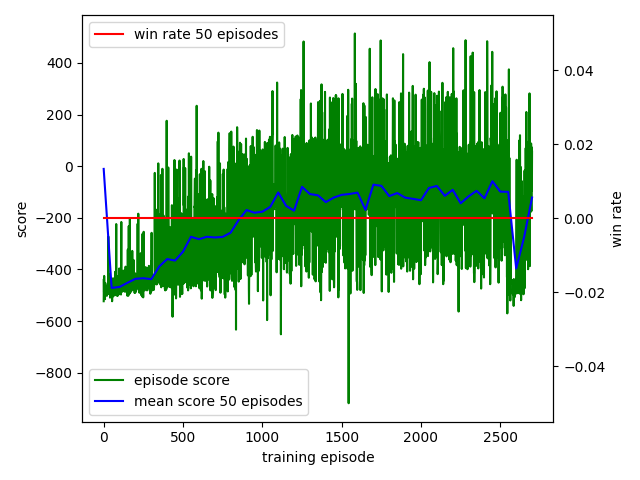

Percebe-se, então, que há uma melhora significativa na média dos pontos do agente ao longo do 1500 primeiros episódios, ou seja, o agente aprendeu. Todavia, depois de 1500 episódios esse crescimento começa a diminuir até um ponto onde ele fica basicamente constante, além disso, a taxa de vitória é muito baixa.

Apesar de haver tido um aprendizado, o mesmo aconteceu até somente um ponto, isso pode ter acontecido por diversos motivos, entre eles: um estado não suficientemente representativo do ambiente, função reforço não muito bem definida, hiperparâmetros que também não foram bem definidos ou rede neural gerada automaticamente não adequada.

Apesar de sabermos que haviam alguns detalhes que podiam ser melhorados na definição do MDP, como por exemplo adicionar informações sobre o fantasma estar assustado ou não, acreditava-se que tanto a definição dos estados quanto a função reforço estavam suficientemente bons para, pelo menos, obter um desempenho melhor do que o que estava sendo obtido e, portanto, decidiu-se primeiro fazer uma busca pelos melhores hiperparâmetros.

### Busca de hiperparâmetros

Para encontrar os melhores hiperparâmetros foi feito um dicionário com todos os valores que desejava-se testar e então feito um produto cartesiano para testar todas as combinações possíveis. Tudo isso foi feito dentro da função parameters_search_dqn, que está abaixo junto com a definição do dicionários com os valores a serem testados:

In [ ]:
def parameters_search_dqn(environment, param_grid_list, n_episodes, args):
    lists = param_grid_list.values()
    param_combinations = list(itertools.product(*lists))
    total_param_combinations = len(param_combinations)
    print("Number of combinations", total_param_combinations)

    # Initialize lists to gather the results over the different combinations
    scores = []
    names = []
    scores_vec = {}

    for i, params in enumerate(param_combinations):
        print("Combination", i, "/", total_param_combinations)
        # Fill the parameters dictionnary with the current parameters combination
        param_grid = {}
        for param_index, param_name in enumerate(param_grid_list):
            param_grid[param_name] = params[param_index]
        print('model:',str(param_grid))
        agent = Agent.create(
                agent='dqn', environment=environment,
                network=dict(type = param_grid['network_type'],
                size = param_grid['size'],
                depth = param_grid['depth']),
                memory = param_grid['memory'],
                batch_size=param_grid['batch_size'],
                update_frequency=param_grid['update_frequency'],
                learning_rate=param_grid['learning_rate'],
                discount=param_grid['discount'],
                predict_terminal_values=param_grid['predict_terminal_values'],
                exploration=param_grid['exploration'],
                variable_noise=param_grid['variable_noise']
            )

        best_score = run_train(environment, agent, n_episodes, 50, 500, visualization = False, save_folder = 'savings0'+str(i), args = args)
        print('-------------------------------------------')
        print('best mean score: ', best_score)
        print('model:',str(param_grid))
        print('-------------------------------------------')
        scores.append(best_score)
        names.append(str(param_grid))
        agent.close()

    # Create a dictionnary of hyperparameters and their results
    dict_scores = dict(zip(names, scores))
    best_model = max(dict_scores, key=dict_scores.get)
    print('best model:', best_model, 'best mean score:', dict_scores[best_model])
    
param_grid_list["DQN"] = {
        "batch_size": [10,100],
        "update_frequency": [1],
        "learning_rate": [0.001],
        'memory': [100000],
        "discount": [0.95,0.8],
        "predict_terminal_values": [True],
        "exploration": [dict(type = 'linear', unit = 'episodes', num_steps = 2000, initial_value = 0.9, final_value = 0.005)],
        "variable_noise": [0.1,0.5,1],
        'l2_regularization ': [0.1],
        "network_type": ['auto'],
        'size': [16,32],
        'depth' : [2,4,6,8]
    }
    #
    parameters_search_dqn(environment, param_grid_list['DQN'], 2500, args)

Após a execução desta função, que treinou todos os modelos por 2500 episódios e demandou bastante tempo devido a todas as combinações possíveis, percebeu-se que o resultado não mudava muito com a mudança destes hiperparâmetros, ou seja, o problema não era o ajuste dos mesmos. 

Decidiu-se, então, estudar mais afundo quais eram as redes que estavam sendo geradas e o que cada uma fazia, visto que, por serem geradas automaticamente baseando-se somente no tipo e tamanho das entradas, o objetivo do aprendizado não era considerado.

Utilizando novamente o método get_architecture() do agente, observou-se que a seguinte rede estava sendo gerada quando era escolhido um size de 8 e um depth de 3:

In [ ]:
Network:  
        Retrieve(name=positions_retrieve, tensor=positions)
        Conv1d(name=positions_conv1d0, size=8, window=3, padding=same, bias=True, activation=relu)
        Conv1d(name=positions_conv1d1, size=8, window=3, padding=same, bias=True, activation=relu)
        Conv1d(name=positions_conv1d2, size=8, window=3, padding=same, bias=True, activation=relu)
        Pooling(name=positions_pooling, reduction=max)
        Register(name=positions_register, tensor=positions-embedding)
        ----
        Retrieve(name=booleans_retrieve, tensor=booleans)
        Embedding(name=booleans_embedding, size=8, num_embeddings=2, bias=True, activation=tanh)
        Conv1d(name=booleans_conv1d0, size=8, window=3, padding=same, bias=True, activation=relu)
        Conv1d(name=booleans_conv1d1, size=8, window=3, padding=same, bias=True, activation=relu)
        Pooling(name=booleans_pooling, reduction=max)
        Register(name=booleans_register, tensor=booleans-embedding)
        ----
        Retrieve(name=retrieve, tensors=[positions-embedding, booleans-embedding], aggregation=concat, axis=0)
        Dense(name=dense0, size=8, bias=True, activation=tanh)Action-value:  Linear(name=action_value, size=5, bias=True)


Ou seja, para o tensor de posições estavam sendo geradas 3 camadas convolucionais e uma de pooling, já para o tensor de booleanos estavam sendo geradas uma camada de embedding, duas convolucionais e uma de pooling. Estudou-se então para quais aplicações estes tipos de redes eram recomendadas e percebeu-se que as redes convolucionais eram muito utilizadas em processamento de imagem por conta da sua capacidade de detectar bordas, agrupamentos, etc, ou seja, elas são muito mais sensíveis à posição dos valores do que o range dos mesmos. A forma como nosso MDP foi definido é muito dependente justamente do range de valores dos tensores, por exemplo, a posição do pacman e do fantasma mais próximo são obtidas somente com as coordenadas x,y dos mesmos, ou seja, as redes convulucionais não são a melhor escolha para este caso, o que pode explicar o mal desempenho do agente.

Por conta dos ótimos resultados utilizando redes convulucionais presentes na literatura e, com isso, ter a possibilidade de escalar também para os layouts mediumClassic e original-classic, escolheu-se adaptar a definição do nosso MDP ao invés de ajustar o tipo da rede. Além disso, a utilização de redes neurais como aproximadores de função faz com que elas consigam se aproveitar melhor de entradas maiores, fazendo com que seja melhor definir um estado quase completo do ambiente e evitar que alguma informação importante seja esquecida de ser adicionada no estado, que pode ser o que tenha acontecido na abordagem anterior.

Sendo assim, foram definidos 9 canais de entrada para a rede, onde cada canal representa um tipo diferente de elemento no grid e isso foi codificado com 1 em cada posição que o elemento existe e 0 caso contrário. Os elementos/canais definidos foram:

- walls - paredes do ambiente
- foods - comidas
- capsules - cápsulas
- pacman - pacman
- last_pacman - pacman no estado anterior
- active_ghosts - fantasmas ativos
- last_active_ghosts - fantasmas ativos no estado anterior
- scared_ghosts - fantasmas assustados
- last_scared_ghosts- fantasmas assustados no estado anterior

Para implementar estes estados foi utilizado um dicionário, channels, contendo cada canal, que foram definidos como uma matriz 2D de tamanho igual ao mapa do jogo. O grid é então atualizado a cada ação tomada, assim como foi feito anteriormente, a única diferença sendo: com esta implementação é necessário ter acesso ao layout do jogo no construtor da classe Environment e, por isso, foi utilizado um DumbAgent para ter um sample do mapa antes do treinamento começar. A definição do estado, a utilização do DumbAgent e os métodos build_state e build_channels estão abaixo:

In [ ]:
# Environment class
class CustomEnvironment2(Environment):
    def __init__(self, initial_state):
        super().__init__()
        self.last_state = None
        self.initial_state = initial_state
        self.grid_width = self.initial_state.data.layout.width
        self.grid_height = self.initial_state.data.layout.height
        self.walls = self.initial_state.getWalls()
        self.initial_channel = self.build_channels(self.initial_state)


    def states(self):
        return {
        'walls': dict(type = 'float', shape = (self.grid_width,self.grid_height), min_value = 0, max_value = 1),
        'foods': dict(type = 'float', shape = (self.grid_width,self.grid_height), min_value = 0, max_value = 1),
        'capsules': dict(type = 'float', shape = (self.grid_width,self.grid_height), min_value = 0, max_value = 1),
        'pacman': dict(type = 'float', shape = (self.grid_width,self.grid_height), min_value = 0, max_value = 1),
        'last_pacman': dict(type = 'float', shape = (self.grid_width,self.grid_height), min_value = 0, max_value = 1),
        'active_ghosts': dict(type = 'float', shape = (self.grid_width,self.grid_height), min_value = 0, max_value = 1),
        'last_active_ghosts': dict(type = 'float', shape = (self.grid_width,self.grid_height), min_value = 0, max_value = 1),
        'scared_ghosts': dict(type = 'float', shape = (self.grid_width,self.grid_height), min_value = 0, max_value = 1),
        'last_scared_ghosts': dict(type = 'float', shape = (self.grid_width,self.grid_height), min_value = 0, max_value = 1)
        }

    def actions(self):
        return dict(type='int', num_values=5)

    def reset(self):

        channels = self.build_channels(self.initial_state)
        initial_state = dict({
            'walls': channels['walls'],
            'foods':channels['foods'],
            'capsules': channels['capsules'],
            'pacman': channels['pacman'],
            'last_pacman': channels['pacman'],
            'active_ghosts': channels['active_ghosts'],
            'last_active_ghotst': channels['active_ghosts'],
            'scared_ghosts': channels['scared_ghosts'],
            'last_scared_ghosts': channels['scared_ghosts']
        })

        self.last_state = initial_state

        return initial_state

    def build_channels(self, state):

        channels = {}

        # build the walls and food
        channels['walls'] = np.zeros((self.grid_width, self.grid_height))
        channels['foods'] = np.zeros((self.grid_width, self.grid_height))
        for i in range(0,self.grid_width):
            for j in range(0,self.grid_height):
                if self.walls[i][j] == True:
                    channels['walls'][i,j] = 1
                if state.hasFood(i,j) == True:
                    channels['foods'][i,j] = 1

        # build pacman position
        channels['pacman'] = np.zeros((self.grid_width, self.grid_height))
        tmp_pos = state.getPacmanPosition()
        i = tmp_pos[0]
        j = tmp_pos[1]
        channels['pacman'][i,j] = 1

        # build capsules position
        channels['capsules'] = np.zeros((self.grid_width, self.grid_height))
        tmp_pos = state.getCapsules()
        for pos in tmp_pos:
            i = pos[0]
            j = pos[1]
            channels['capsules'][i,j] = 1

        # build ghost postions
        channels['active_ghosts'] = np.zeros((self.grid_width, self.grid_height))
        channels['scared_ghosts'] = np.zeros((self.grid_width, self.grid_height))
        for ghost_state in state.getGhostStates():
            pos = ghost_state.getPosition()
            # ceil because ghost positions may be a float sometimes
            i = math.ceil(pos[0])
            j = math.ceil(pos[1])
            if (ghost_state.scaredTimer == 0):
                channels['active_ghosts'][i,j] = 1
            else:
                # the ghost is scared
                channels['scared_ghosts'][i,j] = 1

        return channels

    def build_state(self, state, previous_built_state):

        channels = self.build_channels(state)

        built_state = dict({
            'walls': channels['walls'],
            'foods':channels['foods'],
            'capsules': channels['capsules'],
            'pacman': channels['pacman'],
            'last_pacman': previous_built_state['pacman'],
            'active_ghosts': channels['active_ghosts'],
            'last_active_ghosts': previous_built_state['active_ghosts'],
            'scared_ghosts': channels['scared_ghosts'],
            'last_scared_ghosts': previous_built_state['scared_ghosts']
        })

        return built_state

# DumbAgent usage
args = readCommand("-l smallClassic".split())

#first runs with a dumb agent so the environment can have access to the initial state easily
dumb_agent = DumbAgent()
game = createGame(**args, newAgent = dumb_agent, visualization = False)
game.run()
initial_state = dumb_agent.get_initial_state()

#instantiate the environment
environment = CustomEnvironment(initial_state)

Além disso, desta vez a rede neural utilizada foi ajustada "na mão". Primeiramente os canais foram empilhados e então foram criadas três camadas convulucionais de 16 neurônios cada uma, uma janela de tamanho 2 e função de ativação ReLU, depois uma camada flatten foi adicionada para ajustar o formato dos dados e depois uma Dense fully-connected, por fim, para ajustar ao formato da saída, que é o valor Q(s,a) para cada ação, foi adicionada uma camada Dense fully-connected de 5 neurônios cada e ativação softmax, pois há no total 5 ações possíveis e a softmax gerará uma distribuição de probabilidades para elas. A única mudança nos hiperparâmetros além da definição na rede foi no l2_regularization, que define a regularização l2 do otimizador e, portanto, a criação do agente foi feita da seguinte maneira:

In [ ]:
agent = Agent.create(
            agent='dqn', environment=environment,
            # Automatically configured network
            network= dict(type = 'custom',
                        layers = [ [
                dict(type='retrieve', aggregation='stack', tensors=['walls', 'foods', 'capsules', 'pacman', 'last_pacman', 'active_ghosts', 'last_active_ghosts', 'scared_ghosts', 'last_scared_ghosts']),
                dict(type='conv2d', size=16, window = 2, activation = 'relu'),
                dict(type='conv2d', size=16, window = 2, activation = 'relu'),
                dict(type='conv2d', size=16, window = 2, activation = 'relu'),
                dict(type = 'flatten'),
                dict(type='dense', size=16, activation = 'relu'),
                dict(type='dense', size=5, activation = 'softmax')
            ] ]
                        ),
            memory = 100000,
            # Optimization
            batch_size=10,
            predict_terminal_values = True,
            learning_rate=0.001,
            discount=0.95,
            l2_regularization = 0.1,
            exploration=dict(type = 'linear', unit = 'episodes', num_steps = 2000, initial_value = 0.9, final_value = 0.01),
            variable_noise=0.0
        )

Por conta das redes terem aumentado de tamanho nesta implementação, o tempo de treinamento também aumentou consideravelmente. Mesmo assim, decidiu-se treinar este modelo por 3000 episódios, pois era esperado que o mesmo tivesse um ótimo resultado e escalasse para os mapas maiores. Obteve-se, então, a seguinte curva com a pontuação de cada partida, a média da pontuação dos últimos 50 jogos e a taxa de vitória dos últimos 50 jogos:

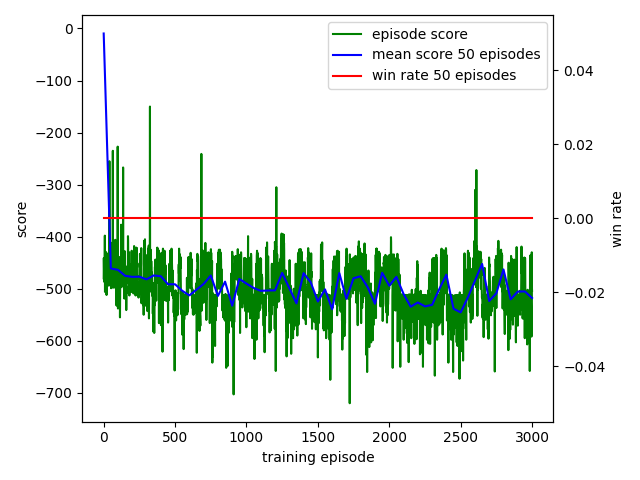

Percebe-se então que não houve convergência do algoritmo, pelo contrário, a média de pontuação caiu ligeiramente ao longo do treinamento. Isso pode ter acontecido por conta das redes neurais serem extremamente flexíveis, fazendo com que seja relativamente fácil elas cairem em um mínimo local ruim. Para tentar contornar este problema, tentou-se ajustar a taxa de aprendizado para que, assim como a taxa de exploração, comece com um valor maior e caia gradativamente ao longo do treinamento. O código do agente, foi, então:

In [ ]:
agent = Agent.create(
            agent='dqn', environment=environment,
            # Automatically configured network
            network= dict(type = 'custom',
                        layers = [ [
                dict(type='retrieve', aggregation='stack', tensors=['walls', 'foods', 'capsules', 'pacman', 'last_pacman', 'active_ghosts', 'last_active_ghosts', 'scared_ghosts', 'last_scared_ghosts']),
                dict(type='conv2d', size=16, window = 2, activation = 'relu'),
                dict(type='conv2d', size=16, window = 2, activation = 'relu'),
                dict(type='conv2d', size=16, window = 2, activation = 'relu'),
                dict(type = 'flatten'),
                dict(type='dense', size=16, activation = 'relu'),
                dict(type='dense', size=5, activation = 'softmax')
            ] ]
                        ),
            memory = 100000,
            # Optimization
            batch_size=10,
            predict_terminal_values = True,
            learning_rate=dict(type = 'linear', unit = 'episodes', num_steps = 2000, initial_value = 0.01, final_value = 0.0005),
            discount=0.95,
            l2_regularization = 0.1,
            exploration=dict(type = 'linear', unit = 'episodes', num_steps = 2000, initial_value = 0.9, final_value = 0.01),
            variable_noise=0.0
        )

Esta abordagem, porém, não fez com que o algoritmo convergisse, obtendo uma curva de aprendizado basicamente igual à anterior. Mesmo assim, a não convergência pode estar atrelada à muitos outros fatores, como as camadas escolhidas, ajuste da função reforço, ajuste da definição dos canais, etc. 

Para contornar o problema diversos experimentos deveriam ser feitos, como testar tipos diferentes de redes e algoritmos (PPO, Double DQN, etc), todos disponíveis dentro do TensorForce, todavia, dado o limite de tempo para entrega do projeto, não foi possível realizar esses experimentos, mas isso será feito ao longo dos próximos meses devido ao nosso interesse no assunto.

Portanto, para o layout smallClassic, o melhor modelo foi o primeiro a ser treinado, com os tensores de posição, mas, como o desempenho do mesmo ainda não foi ideal, decidiu-se carregar o agente treinado e observar como o mesmo estava agindo a fim de fazer ajustes na função reforço. Para isso, utilizou-se o método load do TensorForce:

In [ ]:
agent = Agent.load(directory = os.getcwd()+'/savings', filename = 'agent-284086-20', environment = environment,
    agent = 'dqn',
    network= dict(type = 'auto',
                size = 8,
                depth = 3
                ),
    memory = 100000,
    # Optimization
    batch_size=10, learning_rate=0.001,
    discount=0.97, predict_terminal_values=True,
    exploration=0.01,
    variable_noise=0.0
    )

Observou-se então que o agente aprendeu a sempre comer as duas capsulas primeiro e depois ele ficava "perdido", não comendo as comidas restantes no mapa, o mesmo aparentava ter "decorado" a posição das cápsulas e executava quase sempre a mesma sequência de ações, pois caso um fantasma cruzasse seu caminho por acaso, não havia uma tentativa de desviar. Portanto, a função reforço foi alterada a fim de aumentar a recompensa por comer comida e aumentar a penalidade por não comer nada. Após o treinamento, porém, o resultado foi o mesmo, o que reforça a possibilidade do problema estar na construção dos estados, em especial a forma como a posição dos fantasmas foi definida, já que o pacman não estava responsivo à eles.

## Treinamento no layout mediumClassic

Devido ao limite de tempo citado anteriormente, para os layouts mediumClassic e originalClassic as mesmas duas abordagens do layout smallClassic foram utilizadas: estados definidos usando tensores com a posição x,y no grid de cada agente e estados definidos usando tensores binários do tamanho do grid a fim de utilizá-los com redes convolucionais. Somente alguns parâmetros foram ajustados, os dependentes do tamanho do grid, como os valores máximos de tensores de posição.

Por conta dos maus resultados obtidos no smallClassic, é esperado que os resultados continuem ruins neste mapa.

O agente foi treinado por 3000 episódios, para a abordagem usando tensores com as posições x,y o gráfico da pontuação média a cada 50 episódios, taxa de vitória a cada 50 episódios e pontuação de cada episódio foi:

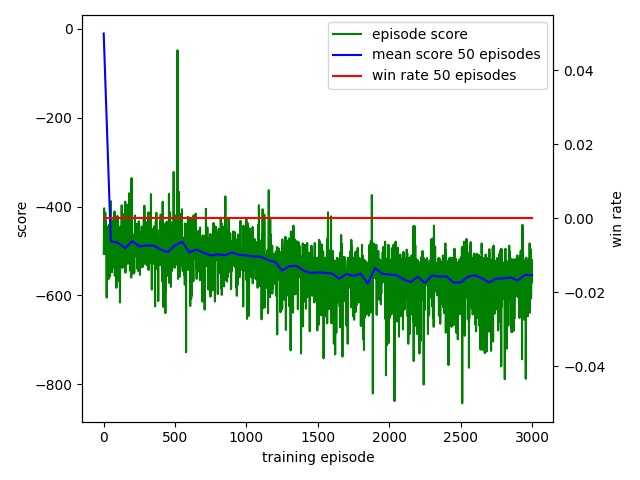

Nota-se, então, que a abordagem que conseguiu pelo menos fazer com que o agente aprenda a comer as cápsulas no layout smallClassic, teve um resultado muito diferente, não houve nenhum aprendizado e, na verdade, a pontuação média caiu ao longo do tempo. Isso pode ter acontecido por conta desta modelagem ser muito simples, suficiente para resolver parcialmente o problema no smallClassic mas simples demais para um mapa mais complexo, uma possível solução talvez seja aumentar o tamanho das redes geradas e será feito em trabalhos futuros.

O gráfico do treinamento da abordagem utilizando tensores binários do tamanho do grid e redes convolucionais foi:

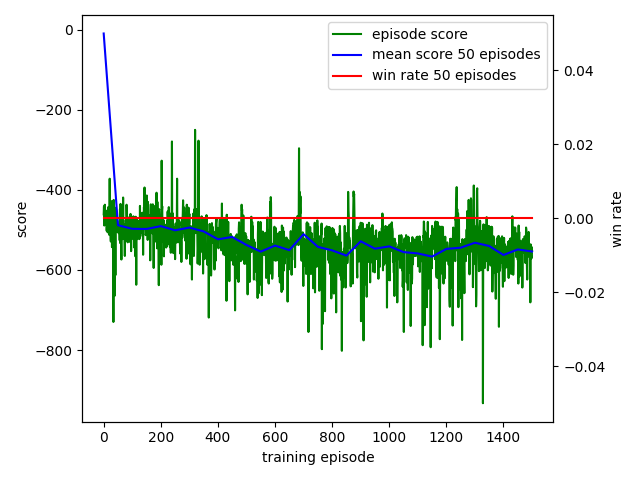

Por conta desta abordagem exigir um maior número de cálculos, as entradas serem maiores (9 matrizes 2D do tamanho do grid) e as redes neurais utilizadas também serem maiores, o tempo de treinamento necessário também é maior. Logo, dado o limite de tempo, o modelo com esta abordagem foi treinado por 1500 episódios. Porém, observa-se que mesmo após 1500 episódios, o agente não conseguiu melhorar seu desempenho, o que era o esperado e pode estar acontecendo devido aos fatores discutidos anteriormente, sendo que, neste caso, onde a complexidade do ambiente é maior, o principal fator é provavelmente a extrema flexibilidade das redes neurais, fazendo com que o modelo caia facilmente em mínimos locais.

## Treinamento no layout originalClassic

Para este layout as mesmas configurações de treinamento feitas no layout mediumClassic foram feitas, ajustando-se somente os parâmetros que dependem do tamanho do grid. O resultado do treinamento obtido com a abordagem utilizando os tensores de posição foi:


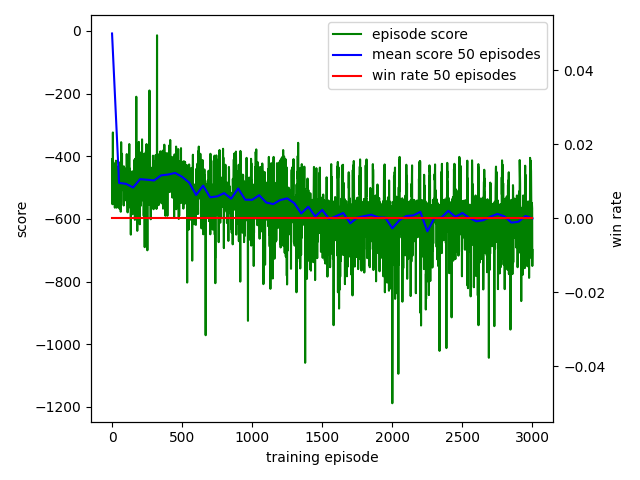

Percebe-se que o resultado foi o mesmo que o no layout mediumClassic, o que provavelmente é devido aos mesmos motivos e serão, também, feitos experimentos no futuro para buscar melhores resultados.

Devido ao tamanho deste layout, as matrizes de entrada são muito maiores e, consequentemente, o custo computacional para treinar o modelo também é muito maior. Por conta disto, a máquina onde estava sendo realizado o treino parava de funcionar antes de chegar a 100 episódios de treinamento, impossibilitando o treinamento e análise dos resultados. Todavia, era esperado que, como não houve convergência utilizando esta abordagem para os layouts menores, o mesmo acontecesse neste layout.

## RL - Conclusão

A dificuldade encontrada em fazer com que os algoritmos de aprendizado por reforço no contexto deste projeto convergissem mostrou que, apesar destes algoritmos apresentarem excelentes resultados na literatura, os mesmos dependem muito de uma boa formulação do MDP e, em geral, a busca por uma boa configuração e hiperparâmetros adequados demanda mais tempo do que os outros paradigmas estudados nesta disciplina: o aprendizado supervisionado e o não supervisionado. Todavia, mesmo com resultados não muito satisfatórios, esta parte deste projeto contribuiu muito para nosso aprendizado e foi além de somente aprendizado por reforço, como por exemplo o estudo sobre o funcionamento de redes neurais, em especial redes convolucionais. Além disso, como dito na discussão, é de nosso conhecimento quais alterações poderiam ser feitas para tentar contornar os problemas, mas, por conta do limite de tempo, elas foram deixadas para um trabalho futuro.

## Bibliografia

Tensorforce framework: https://tensorforce.readthedocs.io/en/latest/index.html

### Comparação entre os paradigmas

Para comparar como o paradigma evolutivo e o por reforço se comportaram nesta tarefa, foram rodados os melhores modelos obtidos em cada layout 10 vezes e computado o número de vitórias e a pontuação médias nessas 10 partidas. Os resultados obtidos estão abaixo.

Evolutivo:
- smallClassic - vitórias não contabilizadas, score médio -12,2
- mediumClassic - vitórias não contabilizadas, score médio -113,5
- originalClassic - vitórias não contabilizadas, score médio -65,3

RL:
- smallClassic - 0 vitórias, score médio 73,4
- mediumClassic - 0 vitórias, score médio -561,8
- originalClassic - 0 vitórias, score médio -585,4

Para o aprendizado por reforço o melhor modelo escolhido foi o modelo que utilizou tensores de posição. Já que o único modelo que apresentou indícios de aprendizado foi o treinado no layout smallClassic, foi feito um teste onde este mesmo modelo era usado nos layouts mediumClassic e originalClassic, porém o pacman não apresentou o mesmo comportamento de ir direto atrás das cápsulas, o que reforça a possibilidade dele só ter "decorado" a posição delas no layout smallClassic. Portanto, os modelos utilizados para cada layout nesta tabela foram os treinados em cada respectivo layout.

Já para o algoritmo evolutivo o melhor modelo, a média do score das partidas de testes em todos os layouts foram negativas, porém apresentando valores bem mais próximos de 0 do que o modelo de aprendizado por reforço. Então, apesar do algoritmo não se sair tão bem quanto o RL no layout smallClassic, nos outros dois layouts ele se saiu significativamente melhor.

O fato do aprendizado por reforço permitir a atualização da política do agente a cada iteração e não somente ao fim de cada partida, e também do reforço ser dado de acordo com as ações tomadas pelo agente e não somente sua pontuação final, faz com que teoricamente um agente treinado com esse paradigma responda melhor as estocatiscidades do ambiente, que no caso deste trabalho se trata do movimento dos fantasmas. Por conta disso era esperado que o pacman obtivesse um melhor resultado com esse paradigma quando comparado ao evolutivo, e foi o que aconteceu no layout smallClassic. Todavia, o modelo não ter escalado para os layouts maiores, assim como dito na discussão, provavelmente é devido à formulação do MDP feita e também da falta de tempo para realizar uma busca mais profunda dos melhores hiperparâmetros.